In [1]:
%cd /home/kwy00/mmdetection
%pwd

/home/kwy00/mmdetection


'/home/kwy00/mmdetection'

In [2]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0,1: NVIDIA GeForce RTX 3090
CUDA_HOME: /
NVCC: Cuda compilation tools, release 11.5, V11.5.119
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.1.0+cu121
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=

In [3]:
!ls -l

합계 168
drwxrwxr-x   2 kwy00 kwy00  4096 Nov 13 20:24 checkpoints
-rw-rw-r--   1 kwy00 kwy00   273 Nov  8 14:25 CITATION.cff
drwxrwxr-x 118 kwy00 kwy00  4096 Nov 10 15:33 configs
drwxrwxr-x   3 kwy00 kwy00  4096 Nov  8 17:11 data
-rw-rw-r--   1 kwy00 kwy00   475 Nov  8 14:25 dataset-index.yml
drwxrwxr-x   2 kwy00 kwy00  4096 Nov  8 14:25 demo
drwxrwxr-x   4 kwy00 kwy00  4096 Nov  8 14:25 docker
drwxrwxr-x   4 kwy00 kwy00  4096 Nov  8 14:25 docs
-rw-rw-r--   1 kwy00 kwy00 11398 Nov  8 14:25 LICENSE
-rw-rw-r--   1 kwy00 kwy00   242 Nov  8 14:25 MANIFEST.in
drwxrwxr-x  14 kwy00 kwy00  4096 Nov  8 15:12 mmdet
drwxrwxr-x   2 kwy00 kwy00  4096 Nov  8 14:25 mmdet.egg-info
-rw-rw-r--   1 kwy00 kwy00  3388 Nov  8 14:25 model-index.yml
drwxrwxr-x   3 kwy00 kwy00  4096 Nov  9 20:30 output
drwxrwxr-x  20 kwy00 kwy00  4096 Nov  8 14:25 projects
-rw-rw-r--   1 kwy00 kwy00   293 Nov  8 14:25 pytest.ini
-rw-rw-r--   1 kwy00 kwy00 28566 Nov  8 14:25 README.md
-rw-rw-r--   1 kwy00 kwy00 28862 Nov  8 14:2

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints # change here to download different model config file

In [7]:
from mmdet.apis import DetInferencer

models = DetInferencer.list_models('mmdet')
models

11/10 15:06:30 - mmengine - INFO - model_name: mask-rcnn_r50_fpn_albu-1x_coco
model_name: atss_r50_fpn_1x_coco
model_name: atss_r101_fpn_1x_coco
model_name: autoassign_r50-caffe_fpn_1x_coco
model_name: boxinst_r50_fpn_ms-90k_coco
model_name: boxinst_r101_fpn_ms-90k_coco
model_name: faster-rcnn_r50_fpn_carafe_1x_coco
model_name: mask-rcnn_r50_fpn_carafe_1x_coco
model_name: cascade-rcnn_r50-caffe_fpn_1x_coco
model_name: cascade-rcnn_r50_fpn_1x_coco
model_name: cascade-rcnn_r50_fpn_20e_coco
model_name: cascade-rcnn_r101-caffe_fpn_1x_coco
model_name: cascade-rcnn_r101_fpn_1x_coco
model_name: cascade-rcnn_r101_fpn_20e_coco
model_name: cascade-rcnn_x101-32x4d_fpn_1x_coco
model_name: cascade-rcnn_x101-32x4d_fpn_20e_coco
model_name: cascade-rcnn_x101-64x4d_fpn_1x_coco
model_name: cascade-rcnn_x101_64x4d_fpn_20e_coco
model_name: cascade-mask-rcnn_r50-caffe_fpn_1x_coco
model_name: cascade-mask-rcnn_r50_fpn_1x_coco
model_name: cascade-mask-rcnn_r50_fpn_20e_coco
model_name: cascade-mask-rcnn_r101-

['mask-rcnn_r50_fpn_albu-1x_coco',
 'atss_r50_fpn_1x_coco',
 'atss_r101_fpn_1x_coco',
 'autoassign_r50-caffe_fpn_1x_coco',
 'boxinst_r50_fpn_ms-90k_coco',
 'boxinst_r101_fpn_ms-90k_coco',
 'faster-rcnn_r50_fpn_carafe_1x_coco',
 'mask-rcnn_r50_fpn_carafe_1x_coco',
 'cascade-rcnn_r50-caffe_fpn_1x_coco',
 'cascade-rcnn_r50_fpn_1x_coco',
 'cascade-rcnn_r50_fpn_20e_coco',
 'cascade-rcnn_r101-caffe_fpn_1x_coco',
 'cascade-rcnn_r101_fpn_1x_coco',
 'cascade-rcnn_r101_fpn_20e_coco',
 'cascade-rcnn_x101-32x4d_fpn_1x_coco',
 'cascade-rcnn_x101-32x4d_fpn_20e_coco',
 'cascade-rcnn_x101-64x4d_fpn_1x_coco',
 'cascade-rcnn_x101_64x4d_fpn_20e_coco',
 'cascade-mask-rcnn_r50-caffe_fpn_1x_coco',
 'cascade-mask-rcnn_r50_fpn_1x_coco',
 'cascade-mask-rcnn_r50_fpn_20e_coco',
 'cascade-mask-rcnn_r101-caffe_fpn_1x_coco',
 'cascade-mask-rcnn_r101_fpn_1x_coco',
 'cascade-mask-rcnn_r101_fpn_20e_coco',
 'cascade-mask-rcnn_x101-32x4d_fpn_1x_coco',
 'cascade-mask-rcnn_x101-32x4d_fpn_20e_coco',
 'cascade-mask-rcnn_x10

In [ ]:
# Choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'

# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

In [ ]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

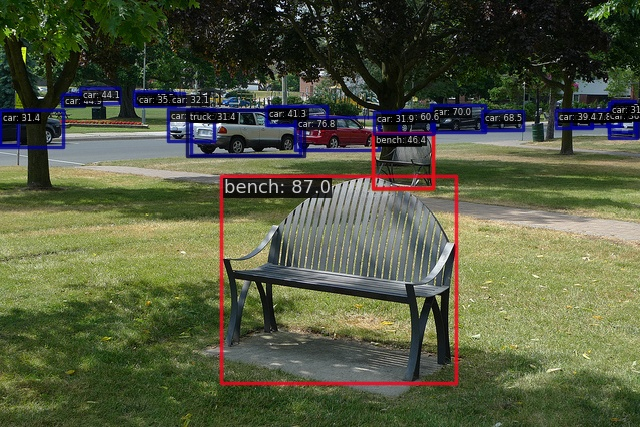

In [15]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

In [9]:
config_car_detection = """
# Inherit and overwrite part of the config based on this config
_base_ = '/home/kwy00/mmdetection/configs/dino/dino-4scale_r50_improved_8xb2-12e_coco.py'
data_root = '/home/kwy00/mmdetection/data/car_detection/' # dataset root

metainfo = {
    'classes' : (
        'chevrolet_malibu_sedan_2012_2016',
        'chevrolet_malibu_sedan_2017_2019',
        'chevrolet_spark_hatchback_2016_2021',
        'chevrolet_trailblazer_suv_2021_',
        'chevrolet_trax_suv_2017_2019',
        'genesis_g80_sedan_2016_2020',
        'genesis_g80_sedan_2021_',
        'genesis_gv80_suv_2020_',
        'hyundai_avante_sedan_2011_2015',
        'hyundai_avante_sedan_2020_',
        'hyundai_grandeur_sedan_2011_2016',
        'hyundai_grandstarex_van_2018_2020',
        'hyundai_ioniq_hatchback_2016_2019',
        'hyundai_sonata_sedan_2004_2009',
        'hyundai_sonata_sedan_2010_2014',
        'hyundai_sonata_sedan_2019_2020',
        'kia_carnival_van_2015_2020',
        'kia_carnival_van_2021_',
        'kia_k5_sedan_2010_2015',
        'kia_k5_sedan_2020_',
        'kia_k7_sedan_2016_2020',
        'kia_mohave_suv_2020_',
        'kia_morning_hatchback_2004_2010',
        'kia_morning_hatchback_2011_2016',
        'kia_ray_hatchback_2012_2017',
        'kia_sorrento_suv_2015_2019',
        'kia_sorrento_suv_2020_',
        'kia_soul_suv_2014_2018',
        'kia_sportage_suv_2016_2020',
        'kia_stonic_suv_2017_2019',
        'renault_sm3_sedan_2015_2018',
        'renault_xm3_suv_2020_',
        'ssangyong_korando_suv_2019_2020',
        'ssangyong_tivoli_suv_2016_2020',
    )
}

train_batch_size_per_gpu = 2
train_num_workers = 2
max_epochs = 20
base_lr = 2.0e-4
stage2_num_epochs = 0
backend_args=None

img_scale=(1920, 1040) # width, height


tta_model = dict(
    type='DetTTAModel',
    tta_cfg=dict(nms=dict(type='nms', iou_threshold=0.85), max_per_img=100)
)

img_scales = [(900, 600), (450, 300), (1350, 900)]
tta_pipeline = [
    dict(type='LoadImageFromFile', to_float32=True, backend_args=None),
    dict(
        type='TestTimeAug',
        transforms=[
            [
                dict(type='Resize', scale=s, keep_ratio=True) for s in img_scales
            ],
            [
                dict(type='RandomFlip', prob=1.),
                dict(type='RandomFlip', prob=0.)
            ],
            [
                dict(
                    type='PhotoMetricDistortion',
                    brightness_delta=32
                ),

                dict(
                    type='Pad',
                    size=(1920, 1040),
                    pad_val=dict(img=(114, 114, 114))),
            ],
            [dict(type='LoadAnnotations', with_bbox=True)],
            [
                dict(
                    type='PackDetInputs',
                    meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape', 
                                'scale_factor', 'flip', 'flip_direction'))
            ]
        ])
]

train_pipeline = [
    
    # dict(type='LoadImageFromFile', backend_args={{_base_.backend_args}}),
    # dict(type='LoadAnnotations', with_bbox=True),
    
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion',
        brightness_delta=32,
        contrast_range=[0.4, 1.5],
        saturation_range=[0.4, 1.5],
    ),  
                
    dict(type='MinIoURandomCrop',
        min_ious=[1.0],
        min_crop_size=0.75,
        bbox_clip_border=True
    ),  
    
      
    dict(type='Mosaic',
        bbox_clip_border=True,
        pad_val = 114,
        prob=1.0,
        center_ratio_range=(0.5, 1.5),
        img_scale=(1920, 1040)
    ),
    dict(
        type='RandomAffine',
        scaling_ratio_range=(0.1, 2),
        border=(-img_scale[0] // 2, -img_scale[1] // 2)
    ),  
    dict(type='MixUp',
        img_scale=(900, 600),
        ratio_range=(0.8, 1.6),
        pad_val=114.0),
        
    dict(type='CutOut',
        n_holes=(4, 6),
        cutout_shape=(30, 30)),  

    dict(type='Normalize',
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    
    dict(type='PackDetInputs')
]

train_dataset = dict(
    _delete_=True, # remove unnecessary Settings
    type='MultiImageMixDataset',
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        type='CocoDataset',
        ann_file='only_train.json',
        data_prefix=dict(img='only_train/'),
        pipeline=[
            dict(type='LoadImageFromFile',  to_float32=True, backend_args={{_base_.backend_args}}),
            dict(type='LoadAnnotations', with_bbox=True)
        ]
    ),
    pipeline=train_pipeline
)

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    persistent_workers=True,
    dataset=train_dataset
    
    # dataset=dict(
    #     _delete_=True,
    #     type='MultiImageMixDataset',
    #     dataset=dict(
    #         metainfo=metainfo,
    #         type='CocoDataset',
    #         data_root=data_root,
    #         ann_file='train.json',
    #         data_prefix=dict(img='train/'),
    #         pipeline=train_pipeline
    #     )
    # )
)

test_pipeline = [
    dict(type='LoadImageFromFile', backend_args={{_base_.backend_args}}, to_float32=True),
    dict(type='Resize', scale=(640, 640), keep_ratio=True),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='PackDetInputs',
        meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape', 
            'scale_factor')
    )
]    
        
val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        data_prefix=dict(img='val/'),
        ann_file='val.json',
        metainfo=metainfo
    )
)

test_dataloader = dict(
    batch_size=1,
    num_workers=2,
    dataset=dict(
        test_mode=True,
        # explicitly add your class names to the field 'metainfo'
        metainfo=metainfo,
        data_root=data_root,
        data_prefix=dict(img='test/'),
        ann_file='test.json',
        pipeline=test_pipeline
    )
)

val_evaluator = dict(ann_file=data_root + 'val.json')
test_evaluator = dict(ann_file=data_root + 'test.json')

model = dict(bbox_head=dict(num_classes=34))

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion',
        brightness_delta=32,
        contrast_range=[0.4, 1.5],
        saturation_range=[0.4, 1.5],
    ),  
    dict(type='CutOut',
    n_holes=(4, 6),
    cutout_shape=(30, 30)),

    
    # dict(type='MinIoURandomCrop',
    #     min_ious=[1.0],
    #     min_crop_size=0.8,
    #     bbox_clip_border=True
    # ),
    

      
    # dict(type='Mosaic',
    #     bbox_clip_border=True,
    #     pad_val = 114,
    #     prob=1.0,
    #     center_ratio_range=(0.5, 1.5),
    #     img_scale=(1920, 1040)
    # ),
    # dict(
    #     type='RandomAffine',
    #     scaling_ratio_range=(0.1, 2),
    #     border=(-img_scale[0] // 2, -img_scale[1] // 2)
    # ),  
    # dict(type='MixUp',
    #     img_scale=img_scale,
    #     ratio_range=(0.8, 1.6),
    #     pad_val=114.0),
                

    dict(type='Normalize',
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    type='AmpOptimWrapper', #AmpOptimWrapper
    optimizer=dict(
        type='AdamW',
        lr=base_lr,
        weight_decay=0.01),
    clip_grad=dict(max_norm=0.1, norm_type=2),
    paramwise_cfg=dict(custom_keys={'backbone': dict(lr_mult=0.1)})
)  # custom_keys contains sampling_offsets and reference_points in DeformDETR

param_scheduler = [
    
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=3200),
    
    #ep6~   -> 8      -> 12     -> 14      -> 18      -> 22        -> 24        -> 28
    #1.0e-4 -> 5.0e-5 -> 2.5e-5 -> 1.25e-5 -> 6.25e-6 -> 3.125e-6 -> 1.5625e-6 -> ...
    #ep28       -> 32         -> 36          ->  40
    #7.8125e-7  -> 3.90625e-7 -> 1.953125e-7 ->  ...
    # dict(
    #     type='MultiStepLR',
    #     begin=0,
    #     end=max_epochs,
    #     by_epoch=True,
    #     milestones=[6, 8, 12, 14, 18, 22, 24, 28, 32, 36, 40],
    #     gamma=0.8)
        
    # dict(
    #     type='CosineAnnealingLR',
    #     eta_min=2.0e-7,
    #     begin=6,
    #     end=max_epochs,
    #     T_max=max_epochs,
    #     by_epoch=True,
    #     convert_to_iter_based=True
    # )
    
    dict(
        type='CosineAnnealingLR',
        eta_min=base_lr*0.05,
        begin=3,
        end=max_epochs,
        T_max=max_epochs,
        by_epoch=True,
        convert_to_iter_based=True
    )
]

default_hooks = dict(
    checkpoint=dict(
        interval=5,
        max_keep_ckpts=4,  # only keep latest 2 checkpoints # ep10, 15, 20, 25, 30, 35, 40 kept
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = './checkpoints/dino-4scale_r50_improved_8xb2-12e_coco_20230818_162607-6f47a913.pth'
# load_from = './work_dirs/dino-4scale_r50_improved_8xb2-10e_car_detection/epoch_10.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=1)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])

"""

with open('./configs/dino/dino-4scale_r50_improved_8xb2-10e_car_detection.py', 'w') as f:
    f.write(config_car_detection)


In [ ]:
!python3 tools/train.py configs/rtmdet/rtmdet_tiny_1xb4-35e_car_detection.py
# !python3 tools/train.py configs/co_detr/co_dino_5scale_swin_l_16xb1_10e_o365tococo_car_detection.py
# !./tools/dist_train.sh configs/rtmdet/rtmdet_tiny_1xb4-35e_car_detection.py 2 # multiple gpu (2) training


In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./work_dirs

In [12]:
from mmdet.apis import DetInferencer
import glob


# Choose to use a config
# config = 'configs/dino/dino-4scale_r50_improved_8xb2-10e_car_detection.py'
config = 'configs/dino/dino-4scale_r50_improved_8xb2-10e_car_detection.py'

# Setup a checkpoint file to load
# checkpoint = glob.glob('./work_dirs/dino-4scale_r50_improved_8xb2-10e_car_detection/epoch_8.pth')[0]
checkpoint = glob.glob('./work_dirs/dino-4scale_r50_improved_8xb2-10e_car_detection/epoch_10.pth')[0]
# # Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

Loads checkpoint by local backend from path: ./work_dirs/dino-4scale_r50_improved_8xb2-10e_car_detection/epoch_10.pth


/home/kwy00/.local/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/home/kwy00/.local/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.TensorboardVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [13]:
# Use the detector to do inference
img = './data/car_detection/test/064507368.png'
result = inferencer(img, out_dir='./output', return_datasamples=False, no_save_pred=True, return_vis=True)

Output()

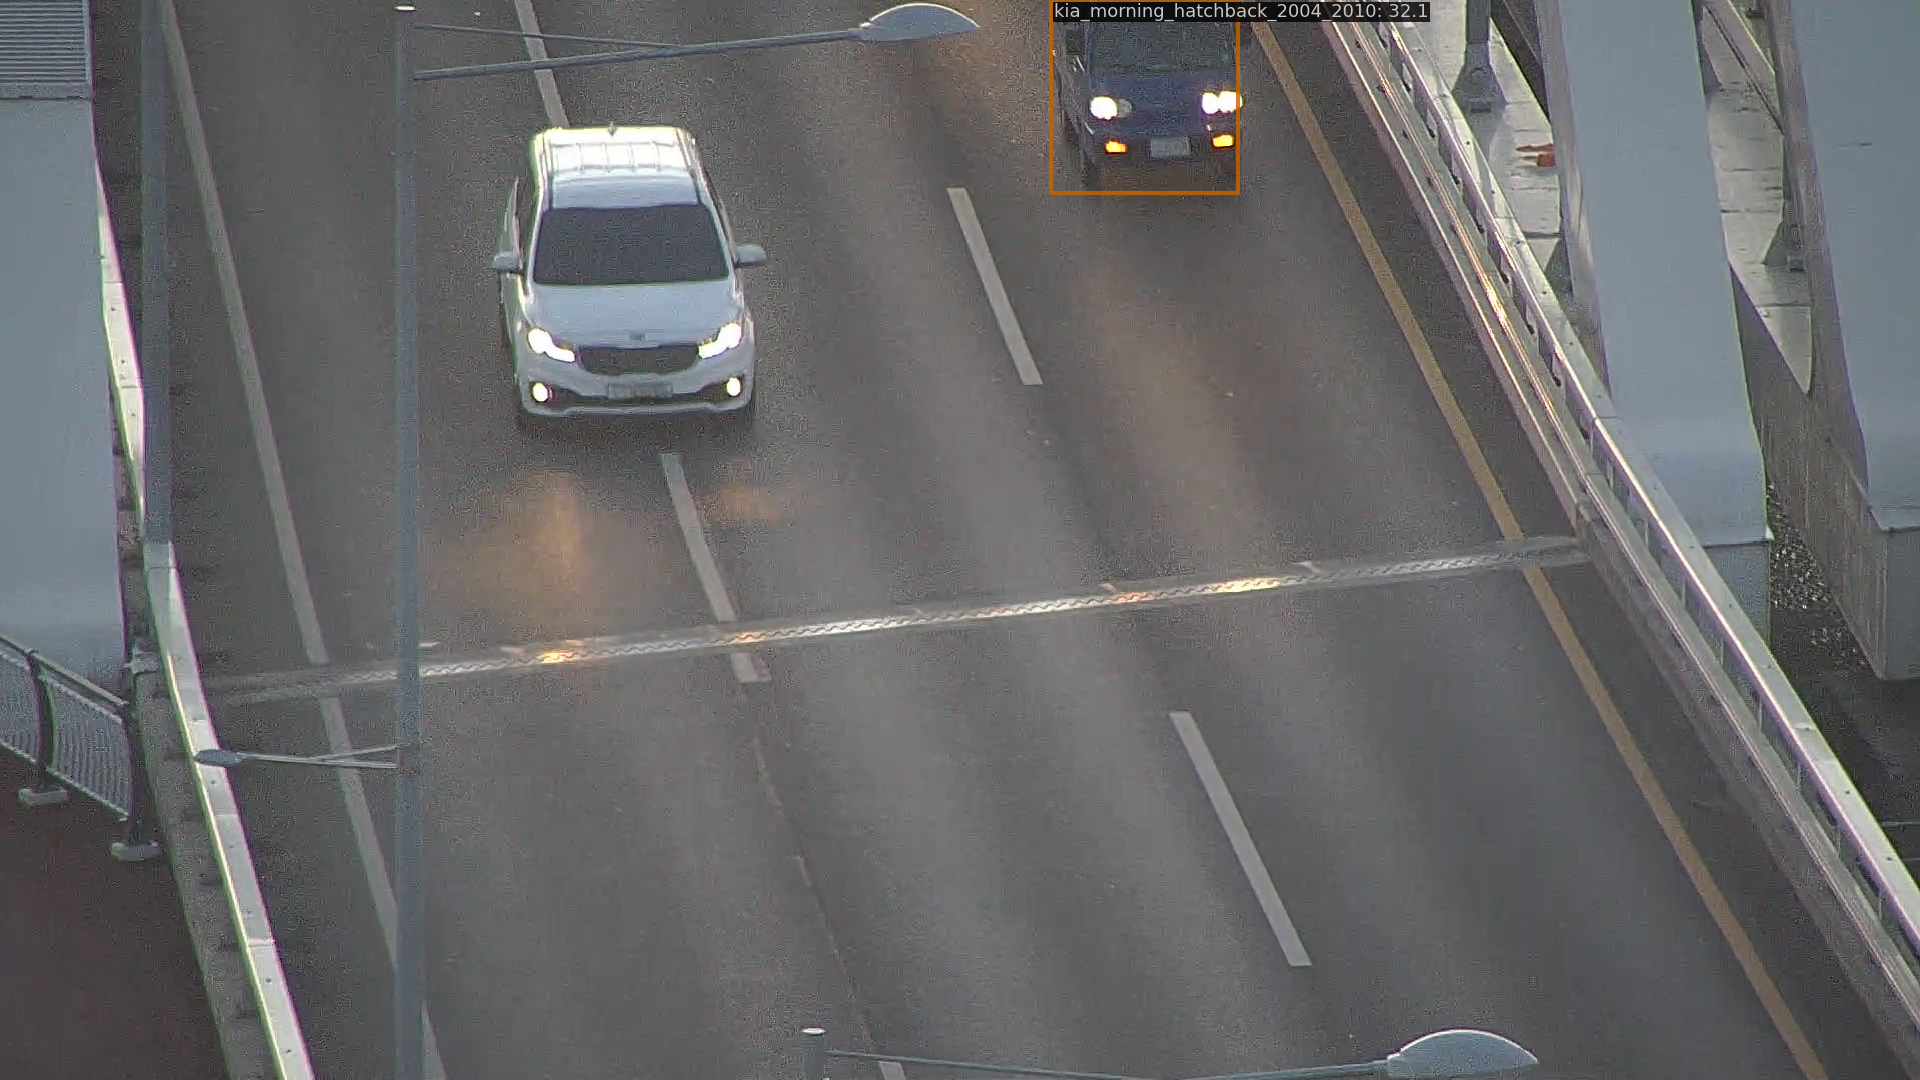

In [14]:
# Show the output image
from PIL import Image 
Image.open('./output/vis/064507368.png')

In [ ]:
from rich.pretty import pprint
pprint(result, max_length=4)

In [15]:
result = inferencer('/home/kwy00/mmdetection/data/car_detection/test/', return_datasamples=False, no_save_pred=True, return_vis=False)

Output()

In [ ]:
from rich.pretty import pprint
pprint(result, max_length=4)

In [39]:
result['predictions'][0]['labels'][4]
len(result['predictions'][0]['labels'])

300

In [16]:
import pandas as pd
import os

test_img = glob.glob('/home/kwy00/mmdetection/data/car_detection/test/*.png')

def inference(predict_size):    
    result_csv = pd.read_csv('/home/kwy00/ysy/sample_submission.csv')
    
    for i in range(len(result['predictions'])):        
        labels = list()
        scores = list()
        for key in ['labels', 'scores', 'bboxes']:
            arr = result['predictions'][i][key]
            if key == 'labels':
                for index in range(predict_size):
                    labels.append(arr[index])
            elif key == 'scores':
                for index in range(predict_size):
                    scores.append(arr[index])
            else:
                for index in range(predict_size):
                    x_min = arr[index][0]
                    y_min = arr[index][1]
                    x_max = arr[index][2]
                    y_max = arr[index][3]
                        
                      
                    index_list = list([1])
                    new_row = pd.DataFrame({"file_name": test_img[i].split('/')[-1],
                                        "class_id": labels[index],
                                        "confidence": scores[index],
                                        "point1_x":x_min, "point1_y":y_min,
                                        "point2_x":x_max, "point2_y":y_min,
                                        "point3_x":x_max, "point3_y":y_max,
                                        "point4_x":x_min, "point4_y":y_max},
                                        index=index_list)
                    result_csv = pd.concat([result_csv, new_row], ignore_index=True)      
                 
    
    resultpath = os.path.join('/home/kwy00/temporary_result', 'baseline_submit.csv')
    # 결과를 CSV 파일로 저장
    result_csv.to_csv(resultpath, index=False)
    
    print('Done.')


In [17]:
inference(20)

/tmp/ipykernel_2767/2105600488.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_csv = pd.concat([result_csv, new_row], ignore_index=True)


Done.


In [ ]:
# 일부 필드 변경
classes = ('chevrolet_malibu_sedan_2012_2016',
'chevrolet_malibu_sedan_2017_2019',
'chevrolet_spark_hatchback_2016_2021',
'chevrolet_trailblazer_suv_2021_',
'chevrolet_trax_suv_2017_2019',
'genesis_g80_sedan_2016_2020',
'genesis_g80_sedan_2021_',
'genesis_gv80_suv_2020_',
'hyundai_avante_sedan_2011_2015',
'hyundai_avante_sedan_2020_',
'hyundai_grandeur_sedan_2011_2016',
'hyundai_grandstarex_van_2018_2020',
'hyundai_ioniq_hatchback_2016_2019',
'hyundai_sonata_sedan_2004_2009',
'hyundai_sonata_sedan_2010_2014',
'hyundai_sonata_sedan_2019_2020',
'kia_carnival_van_2015_2020',
'kia_carnival_van_2021_',
'kia_k5_sedan_2010_2015',
'kia_k5_sedan_2020_',
'kia_k7_sedan_2016_2020',
'kia_mohave_suv_2020_',
'kia_morning_hatchback_2004_2010',
'kia_morning_hatchback_2011_2016',
'kia_ray_hatchback_2012_2017',
'kia_sorrento_suv_2015_2019',
'kia_sorrento_suv_2020_',
'kia_soul_suv_2014_2018',
'kia_sportage_suv_2016_2020',
'kia_stonic_suv_2017_2019',
'renault_sm3_sedan_2015_2018',
'renault_xm3_suv_2020_',
'ssangyong_korando_suv_2019_2020',
'ssangyong_tivoli_suv_2016_2020')